![ibn.png](attachment:c5ab6a53-942a-4e0a-ad7a-f2ba61b2819c.png)

<center><h1 style="font-family: algerian ; font-size: 80px; color: gray">TP : Régression linéaire simple</h1></center>

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


# 1- Dataset


Génération de données aléatoires avec une tendance linéaire avec make_regression: on a un dataset 
(
x
,
y
)
 qui contient 100 exemples, et une seule variable 
x
. Note: chaque fois que la cellule est executée, des données différentes sont générer. Utiliser np.random.seed(0) pour reproduire le meme Dataset a chaque fois.

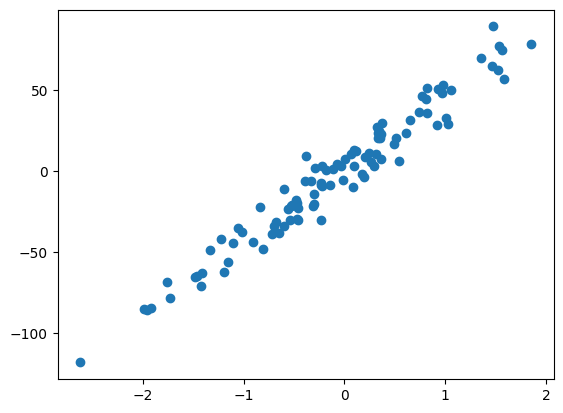

In [2]:
# pour toujours reproduire le meme dataset
np.random.seed(42) 
# question1 : Utilisez la fonction make_regression  pour générer un jeu de données simulées.
x, y = make_regression(n_samples=100, n_features=1, noise=10)
# question2 : Affichez maintenant le nuage de points en utilisant la fonction scatter() de la bibliothèque Matplotlib.
plt.scatter(x, y)


In [3]:
# Question3 : vérifier les dimensions de x et y
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [4]:
# Question4 : redimensionner y
y = y.reshape(y.shape[0], 1)


In [5]:
# Question 5 : Création de la matrice X qui contient la colonne de Biais. 
# Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x
X = np.hstack((x, np.ones(x.shape)))


In [6]:
# Question 6 : affichez la matrice X
X

array([[ 0.93128012,  1.        ],
       [ 0.08704707,  1.        ],
       [-1.05771093,  1.        ],
       [ 0.31424733,  1.        ],
       [-0.47917424,  1.        ],
       [ 0.64768854,  1.        ],
       [-0.46341769,  1.        ],
       [ 0.54256004,  1.        ],
       [ 0.61167629,  1.        ],
       [ 1.0035329 ,  1.        ],
       [ 0.8219025 ,  1.        ],
       [ 1.53803657,  1.        ],
       [ 0.73846658,  1.        ],
       [-0.21967189,  1.        ],
       [-0.8084936 ,  1.        ],
       [ 0.09176078,  1.        ],
       [-1.95967012,  1.        ],
       [ 0.51326743,  1.        ],
       [ 1.03099952,  1.        ],
       [-2.6197451 ,  1.        ],
       [ 0.49671415,  1.        ],
       [ 0.09707755,  1.        ],
       [-0.46572975,  1.        ],
       [ 0.91540212,  1.        ],
       [ 1.56464366,  1.        ],
       [ 1.46564877,  1.        ],
       [-0.60063869,  1.        ],
       [-0.03582604,  1.        ],
       [-0.60170661,

In [7]:
# Question 7 : Finalement, création d'un vecteur parametre θ, initialisé avec des coefficients aléatoires.
np.random.seed(42) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta


array([[ 0.49671415],
       [-0.1382643 ]])

# 2- Modele Linéaire

On implémente un modele F=X.θ, puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de 
θ

In [8]:
# Question 8 : crée une fonction model() pour definir F .  
#The dot() method multiplies each value from one DataFrame with the values from another DataFrame (or Series or array), and adds them together
def model(X, theta):
    return X.dot(theta)


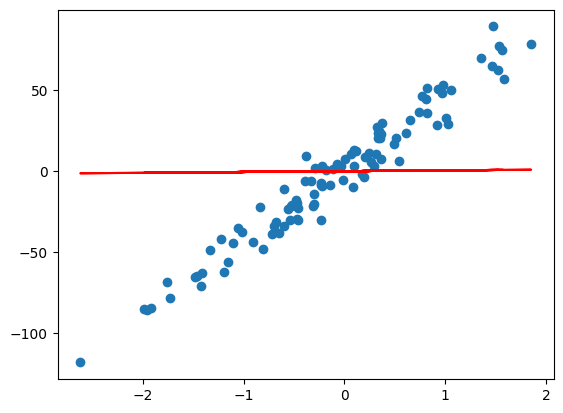

In [9]:
# Question 9 : affichez le nuage de point et le model crée
def model(X, theta):
    return X.dot(theta)
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')


# 3- Fonction Cout : Erreur Quadratique moyenne

![image.png](attachment:6d6fb6fd-82dc-407d-99fb-92c266ff80b5.png)

In [10]:
# Question 10 : crée la fonction cout (erreur quadratique moyenne )
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((X.dot(theta) - y)**2)


In [11]:
# Question 11 : appliquer la fonction cout sur les données génerer 
cost_function(X, y, theta)


np.float64(832.5955843778751)

# 4- Gradients et Descente de Gradient

![image.png](attachment:4c81add5-cc4b-4849-aa4d-4b01b6059a10.png)

In [12]:
# Question 12 : définir la fonction le gradients 
def model(X, theta):  
    return X.dot(theta)  

def grad(X, y, theta):  
    m = len(y)  
    predictions = model(X, theta)  # Shape (m, 1) if theta is (n, 1)  
    return (1/m) * (X.T.dot(predictions - y))  # Ensure correct subtraction


In [13]:


# Question 13: define the gradient descent function  
def gradient_descent(X, y, theta, learning_rate, n_iterations):  
    cost_history = np.zeros(n_iterations)  # Initialization of cost history array  
    
    for i in range(n_iterations):  
        theta = theta - learning_rate * grad(X, y, theta)  # Update the parameter theta  
        cost_history[i] = cost_function(X, y, theta)  # Record the cost at iteration i  
    
    return theta, cost_history  

# 5- Phase d'entrainement

On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α, et c'est partit !Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [14]:
# Question 14 : appliquez la methode de gradient descent 
n_iterations = 1000
learning_rate = 0.01
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)


In [15]:
# Question 15 : affichez la valeur theta apres la phase d'entrainement 
theta_final # voici les parametres du modele une fois que la machine a été entrainée


array([[44.42225556],
       [ 1.15862938]])

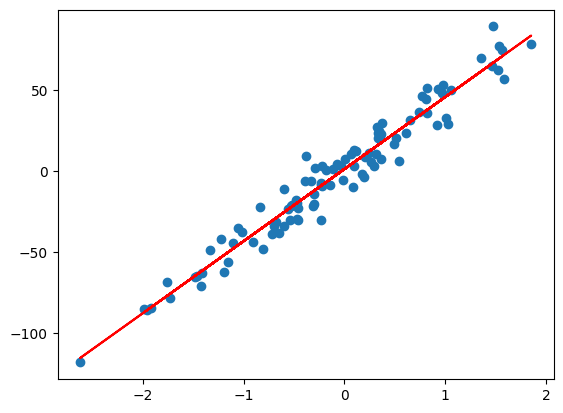

In [16]:

# question 16 : création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# question 17 : Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')


# 6- Courbes d'apprentissage

Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

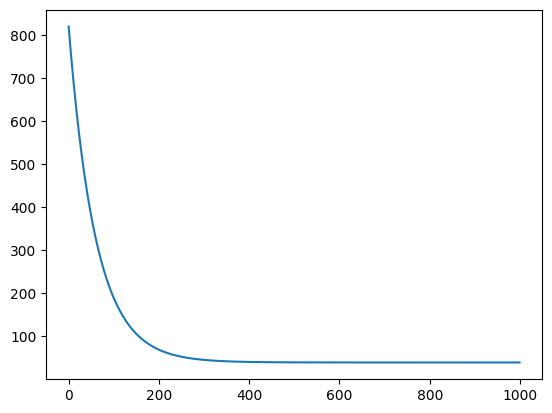

In [17]:
# Question 18 : affichez la courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)


# 7- Evaluation finale

Pour évaluer la réelle performance de notre modele avec une métrique populaire, on peut utiliser le coefficient de détermination, aussi connu sous le nom R2. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

![image.png](attachment:ead9aac0-5da6-45fb-85d8-057af312752f.png)

In [1]:
# Question 19 : définir la fonction pour calculer le coefficient de détermination  
def coef_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u / v

In [19]:
# question 20 : affichez la valeur du cofficient de détermination 
coef_determination(y, predictions) 

np.float64(0.9538251240979674)